In [1]:
import os
import cv2
import numpy as np

In [2]:
normal_folder = "C:/Users/soumi/OneDrive/Desktop/Research/Normal Oral Mucosa"
abnormal_folder = "C:/Users/soumi/OneDrive/Desktop/Research/Abnormal cases"

In [3]:
normal_images = []
abnormal_images = []

In [4]:
def read_images_from_folder(folder_path, target_list):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                target_list.append(img)

In [5]:
read_images_from_folder(normal_folder, normal_images)

In [6]:
read_images_from_folder(abnormal_folder, abnormal_images)

In [7]:
normal_images[86]

array([[[19, 18, 22],
        [19, 18, 22],
        [19, 18, 22],
        ...,
        [12,  7,  9],
        [12,  7,  9],
        [12,  7,  9]],

       [[19, 18, 22],
        [19, 18, 22],
        [19, 18, 22],
        ...,
        [12,  7,  9],
        [12,  7,  9],
        [12,  7,  9]],

       [[19, 18, 22],
        [19, 18, 22],
        [19, 18, 22],
        ...,
        [12,  7,  9],
        [12,  7,  9],
        [12,  7,  9]],

       ...,

       [[25, 19, 24],
        [25, 19, 24],
        [25, 19, 24],
        ...,
        [30, 28, 27],
        [30, 28, 27],
        [30, 28, 27]],

       [[25, 19, 24],
        [25, 19, 24],
        [25, 19, 24],
        ...,
        [30, 28, 27],
        [30, 28, 27],
        [30, 28, 27]],

       [[25, 19, 24],
        [25, 19, 24],
        [25, 19, 24],
        ...,
        [30, 28, 27],
        [30, 28, 27],
        [30, 28, 27]]], dtype=uint8)

In [8]:
target_size = (256,256)

def preprocess_image(image):
    image = cv2.resize(image, target_size)

    if image.shape[:2] != target_size:
        h, w = image.shape[:2]
        top, bottom, left, right = 0, 0, 0, 0

        if h < target_size[0]:
            top = (target_size[0] - h) // 2
            bottom = target_size[0] - h - top

        if w < target_size[1]:
            left = (target_size[1] - w) // 2
            right = target_size[1] - w - left

        image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))

    image = image.astype('float32') / 255.0

    return image

preprocessed_normal_images = [preprocess_image(image) for image in normal_images]
preprocessed_abnormal_images = [preprocess_image(image) for image in abnormal_images]

In [9]:
normal_data = np.array(preprocessed_normal_images)
abnormal_data = np.array(preprocessed_abnormal_images)

In [10]:
normal_data[56]

array([[[0.654902  , 0.61960787, 0.5686275 ],
        [0.6666667 , 0.63529414, 0.5686275 ],
        [0.67058825, 0.6392157 , 0.57254905],
        ...,
        [0.43529412, 0.42352942, 0.39215687],
        [0.4117647 , 0.4       , 0.36862746],
        [0.4509804 , 0.43529412, 0.41568628]],

       [[0.65882355, 0.62352943, 0.57254905],
        [0.6666667 , 0.63529414, 0.5686275 ],
        [0.67058825, 0.6392157 , 0.57254905],
        ...,
        [0.39607844, 0.38431373, 0.3529412 ],
        [0.41960785, 0.40784314, 0.3764706 ],
        [0.47058824, 0.45490196, 0.43529412]],

       [[0.65882355, 0.62352943, 0.5647059 ],
        [0.6666667 , 0.63529414, 0.5686275 ],
        [0.6745098 , 0.6431373 , 0.5764706 ],
        ...,
        [0.40784314, 0.3882353 , 0.3529412 ],
        [0.47058824, 0.4509804 , 0.41568628],
        [0.5176471 , 0.49803922, 0.48235294]],

       ...,

       [[0.0627451 , 0.03921569, 0.12941177],
        [0.05882353, 0.03529412, 0.12941177],
        [0.06666667, 0

In [11]:
abnormal_data[45]

array([[[0.41960785, 0.5411765 , 0.5294118 ],
        [0.42745098, 0.54901963, 0.5372549 ],
        [0.4392157 , 0.56078434, 0.56078434],
        ...,
        [0.03137255, 0.01960784, 0.21568628],
        [0.05098039, 0.02745098, 0.2509804 ],
        [0.02745098, 0.        , 0.23921569]],

       [[0.40784314, 0.5294118 , 0.5176471 ],
        [0.43137255, 0.5529412 , 0.5411765 ],
        [0.43529412, 0.5568628 , 0.5529412 ],
        ...,
        [0.04313726, 0.02745098, 0.23137255],
        [0.03137255, 0.01176471, 0.21960784],
        [0.03529412, 0.01176471, 0.24313726]],

       [[0.41568628, 0.5372549 , 0.5294118 ],
        [0.43137255, 0.5529412 , 0.54509807],
        [0.44313726, 0.5647059 , 0.56078434],
        ...,
        [0.02352941, 0.00784314, 0.21176471],
        [0.03529412, 0.01568628, 0.23137255],
        [0.03137255, 0.01176471, 0.23137255]],

       ...,

       [[0.03529412, 0.07843138, 0.16470589],
        [0.02745098, 0.08627451, 0.17254902],
        [0.04313726, 0

In [12]:
import matplotlib.pyplot as plt

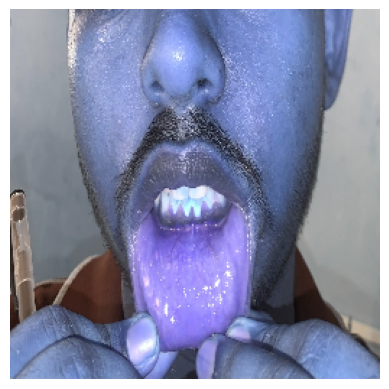

In [14]:
image_to_display = normal_data[51]

plt.imshow(image_to_display)
plt.axis('off')  
plt.show()

In [15]:
X = np.concatenate((normal_data, abnormal_data), axis=0)
y = np.concatenate((np.zeros(normal_data.shape[0]), np.ones(abnormal_data.shape[0])))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
y_train[9]

0.0

In [18]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [19]:
# CNN Model 
def get_model():
    model = Sequential() 

    # Convolutional Layer with input shape (256,256,3)
    model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(256,256,3)) )

    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Dropout(rate=0.25))

    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )
    
    return model

In [20]:
import tensorflow as tf

In [21]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:DML:0', device_type='DML')]

In [22]:
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train, y_train, epochs = 15)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 228 samples
Epoch 1/15
228/228 [==============================] - 13s 58ms/sample - loss: 1.2417 - acc: 0.5175
Epoch 2/15
228/228 [==============================] - 6s 28ms/sample - loss: 0.6639 - acc: 0.5658
Epoch 3/15
228/228 [==============================] - 7s 32ms/sample - loss: 0.6151 - acc: 0.6930
Epoch 4/15
228/228 [==============================] - 7s 33ms/sample - loss: 0.5781 - acc: 0.7061
Epoch 5/15
228/228 [==============================] - 6s 26ms/sample - loss: 0.3938 - acc: 0.8596
Epoch 6/15
228/228 [==============================] - 6s 28ms/sample - loss: 0.4614 - acc: 0.7632
Epoch 7/15
228/228 [==============================] - 6s 26ms/sample - loss: 0.4420 - acc: 0.7851
Epoch 8/15
228/228 [==============================] - 6s 26ms/sample - loss: 0.3573 - acc: 0.8596
Epoch 9/15
228/228 

In [23]:
gpu_model.evaluate(X_test, y_test)

57/57 [==============================] - 1s 11ms/sample - loss: 1.6070 - acc: 0.7719


[1.606969256150095, 0.77192986]